# TP 5

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

###  Détecter le mouvement par la méthode des différences d’images

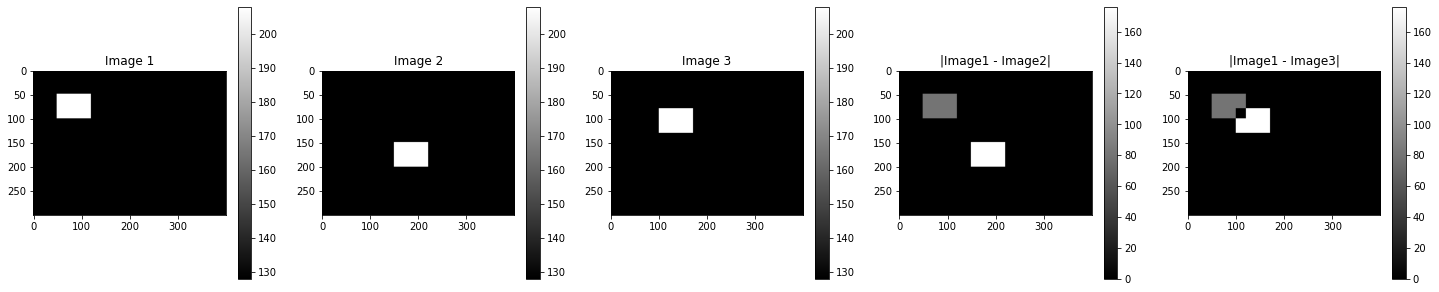

In [2]:
img1 = cv2.imread("Images/im1_TP14.bmp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Images/im2_TP14.bmp", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("Images/im3_TP14.bmp", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(25, 5))
plt.subplot(1, 5, 1)
plt.imshow(img1, cmap="gray")
plt.title('Image 1')
plt.colorbar()
plt.subplot(1, 5, 2)
plt.imshow(img2, cmap="gray")
plt.title('Image 2')
plt.colorbar()
plt.subplot(1, 5, 3)
plt.imshow(img3, cmap="gray")
plt.title('Image 3')
plt.colorbar()
plt.subplot(1, 5, 4)
plt.imshow(np.abs(img1 - img2), cmap="gray")
plt.title('|Image1 - Image2|')
plt.colorbar()
plt.subplot(1, 5, 5)
plt.imshow(np.abs(img1 - img3), cmap="gray")
plt.title('|Image1 - Image3|')
plt.colorbar()

### Comme avant, mais avec 3 images

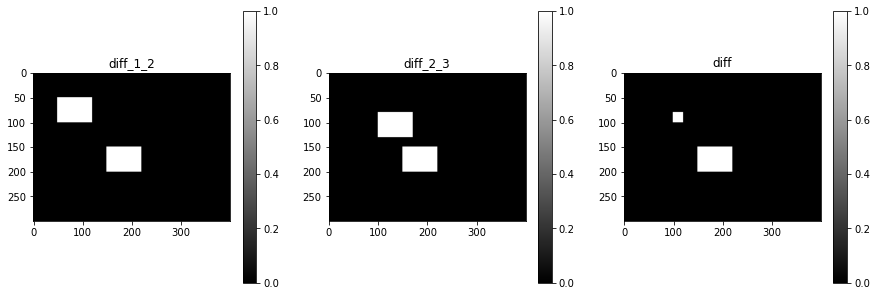

In [3]:
diff_1_2 = np.abs(img1 - img2) > 0
diff_2_3 = np.abs(img2 - img3) > 0
diff = np.multiply(diff_1_2, diff_2_3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(diff_1_2, cmap="gray")
plt.title('diff_1_2')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(diff_2_3, cmap="gray")
plt.title('diff_2_3')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(diff, cmap="gray")
plt.title('diff')
plt.colorbar()

###  détecter le mouvement dans des séquences d’images (Vidéo)

https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html

In [6]:
movie = cv2.VideoCapture('Films/entree_voiture_02.avi')

# Initialise background substractor
fgbg = cv2.createBackgroundSubtractorMOG2()

# Create a morphological operator
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

ret, ref_frame = movie.read() # Read first frame

while ret is True:
    ret, last_frame = movie.read() # Read frame
    
    if ret is True: # If there is no errors while reading the frame...
        ref_frame_gray = cv2.cvtColor(ref_frame, cv2.COLOR_BGR2GRAY) # Convert to gray-scale
        ref_frame_gray = np.array(ref_frame_gray, dtype=float)
        
        last_frame_gray = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY) # Convert to gray-scale
        last_frame_gray = np.array(last_frame_gray, dtype=float)
        
        # Compute image difference
        frame_diff = np.abs(ref_frame_gray - last_frame_gray)
        detected_motion = np.array(frame_diff, dtype=np.uint8)
        
        # Apply thresholding
        ret2, detected_motion_thresholded = cv2.threshold(detected_motion, 50, 255, cv2.THRESH_BINARY) # Binarizing detected motion
        
        # Background substraction
        fgmask = fgbg.apply(last_frame)
        fgmask_enhanced = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel) # Apply morph operator (opening)
        
        # print('Image difference max, min=' + str(np.max(detected_motion)) + ', ' + str(np.min(detected_motion)))  
        
        output_img_1 = np.concatenate((last_frame, cv2.cvtColor(detected_motion, 1)), axis=1)
        output_img_2 = np.concatenate((cv2.cvtColor(detected_motion_thresholded, 1), cv2.cvtColor(fgmask_enhanced, 1)), axis=1)
        output_img = np.concatenate((output_img_1, output_img_2), axis=0)
        cv2.imshow('Windows', output_img)
        cv2.waitKey(40) # Frame rate = 25 img / s
        
    ref_frame = last_frame # Update reference frame

# When everything done, release the capture
movie.release()
cv2.destroyAllWindows()

### Construction d’une image de référence

Text(0.5, 1.0, 'Accumulation image')

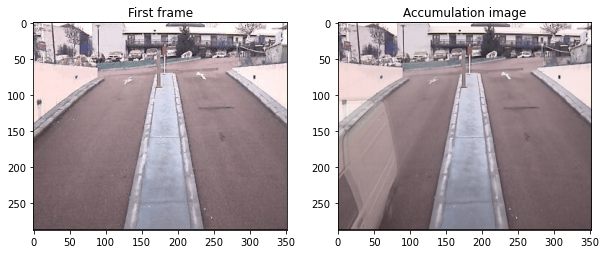

In [14]:
movie = cv2.VideoCapture('Films/entree_voiture_02.avi')

ret, frame = movie.read() # Read first frame
count = 1
img_acc = frame.astype(np.float32)
img_first = frame

while ret is True:
    ret, frame = movie.read() # Read frame
    
    if ret == True:
        count += 1
        img_acc += frame.astype(np.float32)
    
movie.release()
    
img_acc /= count

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_first)
plt.title('First frame')
plt.subplot(1, 2, 2)
plt.imshow(img_acc.astype(np.uint8))
plt.title('Accumulation image')

###  A partir de cette référence, programme permettant la détection du mouvement

In [16]:
movie = cv2.VideoCapture('Films/entree_voiture_02.avi')

img_acc_gray = cv2.cvtColor(img_acc.astype(np.uint8), cv2.COLOR_BGR2GRAY).astype(np.float32)

ret, frame = movie.read() # Read first frame

while ret is True:
    ret, frame = movie.read() # Read frame
    
    if ret is True: # If there is no errors while reading the frame...
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.uint8)
        
        # Compute image difference
        detected_motion = np.abs(img_acc_gray - frame_gray).astype(np.uint8)
        
        # Apply thresholding
        ret2, detected_motion_thresholded = cv2.threshold(detected_motion, 50, 255, cv2.THRESH_BINARY) # Binarizing detected motion
        
        output_img = np.concatenate((frame, cv2.cvtColor(detected_motion_thresholded, 1)), axis=1)
        cv2.imshow('Windows', output_img)
        cv2.waitKey(40) # Frame rate = 25 img / s
        

# When everything done, release the capture
movie.release()
cv2.destroyAllWindows()

### Question autre

https://docs.opencv.org/3.4/d4/dee/tutorial_optical_flow.html

### Lucas-Kanade

In [5]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))

# Read video
movie = cv2.VideoCapture('Films/entree_voiture_02.avi')

# Take first frame and find corners in it
ret, old_frame = movie.read() # Read first frame
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY) # Convert to gray-scale

p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while ret is True:
    ret, frame = movie.read() # Read frame
    
    if ret is True: # If there is no errors while reading the frame...
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Convert to gray-scale
        
        # Calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        
        # Select good points
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]
            
        # Draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
            
        img = cv2.add(frame, mask)
        
        cv2.imshow('Windows', img)
        cv2.waitKey(40) # Frame rate = 25 img / s    
        
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)
        
        
# When everything done, release the capture
movie.release()
cv2.destroyAllWindows()

### Dense optical flow

In [9]:
# Read video
movie = cv2.VideoCapture('Films/entree_voiture_02.avi')

# Take first frame and find corners in it
ret, old_frame = movie.read() # Read first frame
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY) # Convert to gray-scale

hsv = np.zeros_like(old_frame)
hsv[..., 1] = 255

while ret is True:
    ret, frame = movie.read() # Read frame
    
    if ret is True: # If there is no errors while reading the frame...
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Convert to gray-scale
        
        flow = cv2.calcOpticalFlowFarneback(old_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = ang*180/np.pi/2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        
        img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        
        cv2.imshow('Windows', img)
        cv2.waitKey(40) # Frame rate = 25 img / s    
        
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        
        
# When everything done, release the capture
movie.release()
cv2.destroyAllWindows()